In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action='ignore') 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


In [3]:
df = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [5]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


<AxesSubplot:>

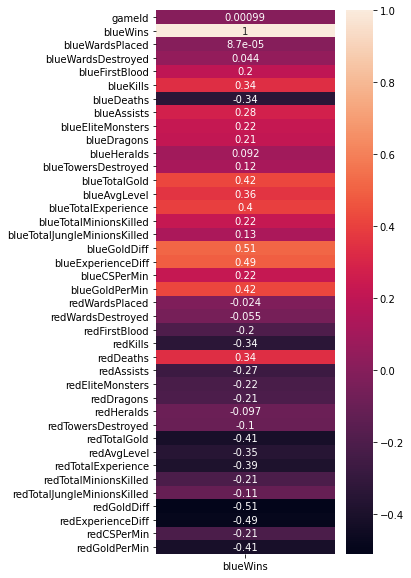

In [6]:
# blue wins 를 기준으로 상관계수 분석( blue wins 종속변수)
fig = plt.figure(figsize=(4, 10))
sns.heatmap(df.corr()[['blueWins']], annot=True)

In [7]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

# Visualization

<AxesSubplot:xlabel='blueGoldDiff', ylabel='Count'>

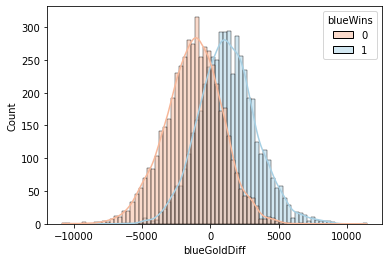

In [8]:
sns.histplot(x='blueGoldDiff', data=df, hue='blueWins', palette='RdBu', kde=True)

<AxesSubplot:xlabel='blueKills', ylabel='Count'>

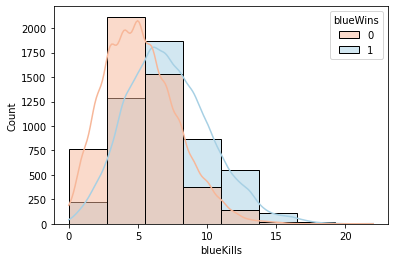

In [9]:
sns.histplot(x='blueKills', data=df, hue='blueWins', palette='RdBu', kde=True, bins=8)

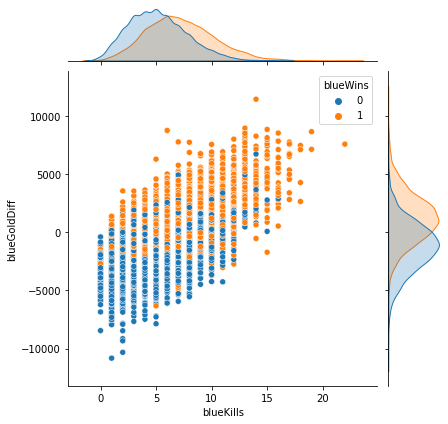

In [10]:
sns.jointplot(x='blueKills', y='blueGoldDiff', data=df, hue='blueWins')

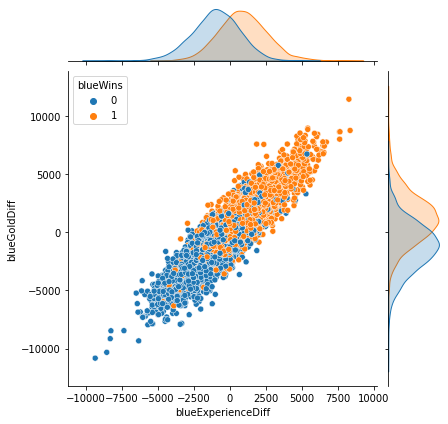

In [11]:
sns.jointplot(x='blueExperienceDiff', y='blueGoldDiff', data=df, hue='blueWins')

<AxesSubplot:xlabel='blueDragons', ylabel='count'>

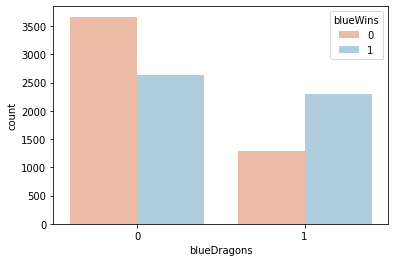

In [12]:
sns.countplot(x='blueDragons', data=df, hue='blueWins', palette='RdBu')

<AxesSubplot:xlabel='redDragons', ylabel='count'>

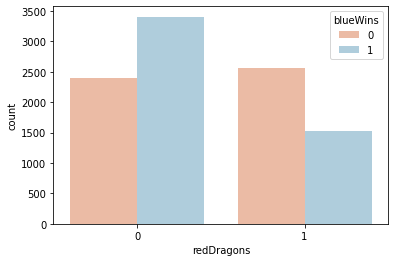

In [13]:
sns.countplot(x='redDragons', data=df, hue='blueWins', palette='RdBu')

<AxesSubplot:xlabel='blueFirstBlood', ylabel='count'>

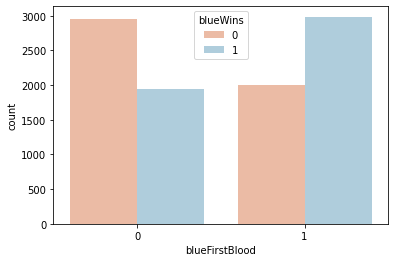

In [14]:
sns.countplot(x='blueFirstBlood', data=df, hue='blueWins', palette='RdBu')

# preprocessing

In [15]:
print(df.columns)
print(len(df.columns))

#Delete unnecessary columns to avoid multicollinearity
df.drop(['gameId', 'redFirstBlood', 'redKills', 'redDeaths',
       'redTotalGold', 'redTotalExperience', 'redGoldDiff',
       'redExperienceDiff'], axis=1, inplace=True)
print(df.columns)
print(len(df.columns))

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')
40
Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDrago

In [16]:
X_num = df[['blueWardsPlaced', 'blueWardsDestroyed', 
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]
X_cat = df[['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 'redHeralds']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#  LogisticRegression 

In [17]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
scores = cross_val_score(model_lr, X_train,y_train, cv=10) # model, train, target, cross validation
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.73843931 0.70809249 0.71387283 0.72109827 0.71676301 0.74529667
 0.73516643 0.71780029 0.73227207 0.73806078]
cross-val-score.mean 
0.727


In [18]:
pred = model_lr.predict(X_test)
print("Test Accuracy: {}%".format(round(model_lr.score(X_test, y_test)*100, 2)))
print(classification_report(y_test, pred))

Test Accuracy: 74.22%
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



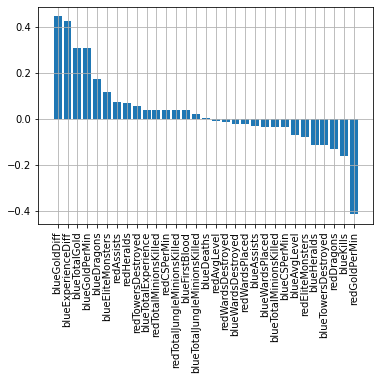

In [19]:
model_coef = pd.DataFrame(data=model_lr.coef_[0], index=X.columns, columns=['Model Coefficient'])
model_coef.sort_values(by='Model Coefficient', ascending=False, inplace=True)
plt.bar(model_coef.index, model_coef['Model Coefficient'])
plt.xticks(rotation=90)
plt.grid()
plt.show()

# XGBClassifier

In [20]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
scores = cross_val_score(model_xgb, X_train,y_train, cv=10) # model, train, target, cross validation
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

[12:34:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:34:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

In [21]:
pred = model_xgb.predict(X_test)
print("Test Accuracy: {}%".format(round(model_xgb.score(X_test, y_test)*100, 2)))

print(classification_report(y_test, pred))

Test Accuracy: 72.23%
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1469
           1       0.72      0.73      0.73      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



<BarContainer object of 31 artists>

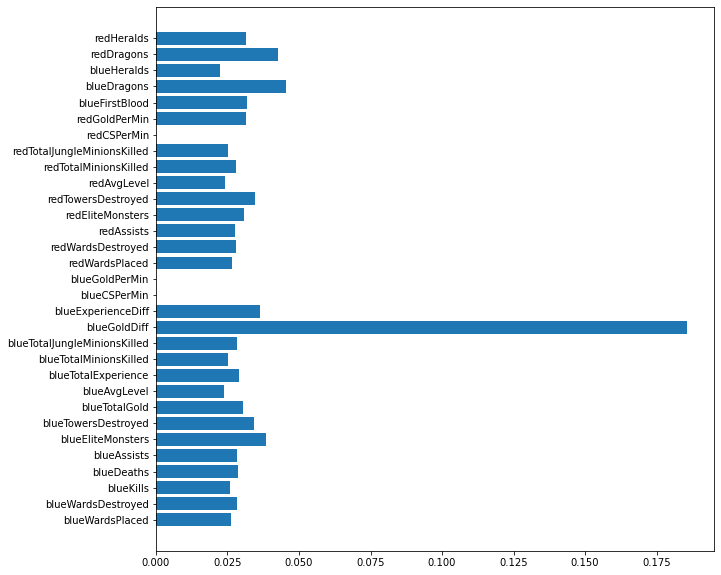

In [22]:
fig = plt.figure(figsize=(10, 10))
plt.barh(X.columns, model_xgb.feature_importances_)

# DecisionTreeClassifier

In [23]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
scores = cross_val_score(dt, X_train,y_train, cv=10) # model, train, target, cross validation
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.61560694 0.62716763 0.62861272 0.63583815 0.60404624 0.62952243
 0.64833575 0.63096961 0.63386397 0.61794501]
cross-val-score.mean 
0.627


In [24]:
pred = dt.predict(X_test)
print("Test Accuracy: {}%".format(round(dt.score(X_test, y_test)*100, 2)))
print(classification_report(y_test, pred))

Test Accuracy: 61.94%
              precision    recall  f1-score   support

           0       0.61      0.62      0.62      1469
           1       0.62      0.62      0.62      1495

    accuracy                           0.62      2964
   macro avg       0.62      0.62      0.62      2964
weighted avg       0.62      0.62      0.62      2964



<BarContainer object of 31 artists>

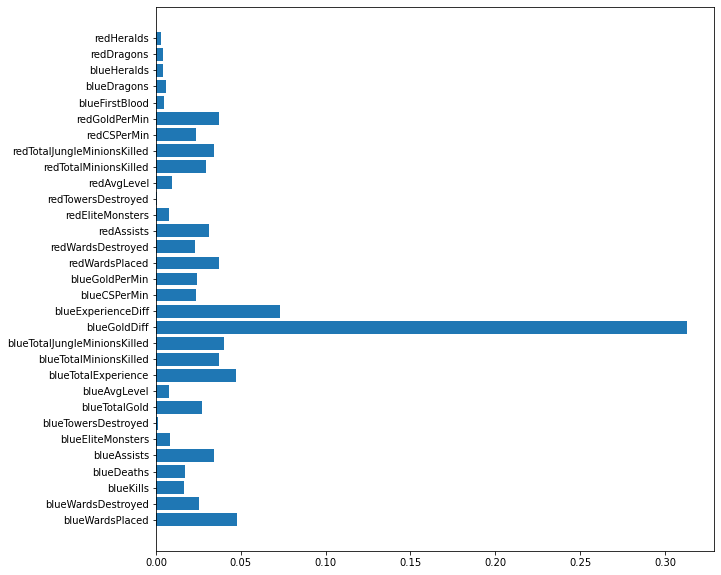

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.barh(X.columns, dt.feature_importances_)

# KNN

In [26]:
best_Kvalue = 0
best_score = 0
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    score = round(knn.score(X_test, y_test)*100,2)
#     print(f"Test Accuracy: {score}%, knn number {i}")
    if score > best_score:
        
        best_score = round(score)
        best_Kvalue = i
        
print(f"Best KNN Value: {best_Kvalue}")
print(f"Test Accuracy: {best_score}%")

Best KNN Value: 13
Test Accuracy: 72%


In [27]:
knn = KNeighborsClassifier(n_neighbors=best_Kvalue)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, pred))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       0.71      0.73      0.72      1469
           1       0.73      0.71      0.72      1495

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



# SVM

In [28]:
svm = SVC(random_state=42, gamma="auto")
svm.fit(X_train, y_train)
scores = cross_val_score(svm, X_train,y_train, cv=10) 
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))


cross-val-score 
[0.7283237  0.70520231 0.69942197 0.70953757 0.70375723 0.74529667
 0.72937771 0.72648336 0.72793054 0.73371925]
cross-val-score.mean 
0.721


In [29]:
pred = svm.predict(X_test)
print("Test Accuracy: {}%".format(round(svm.score(X_test, y_test)*100, 2)))
print("SVM Classifier report: \n\n", classification_report(y_test, pred))

Test Accuracy: 73.48%
SVM Classifier report: 

               precision    recall  f1-score   support

           0       0.73      0.74      0.73      1469
           1       0.74      0.73      0.73      1495

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



# RandomForestClassifier

In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
scores = cross_val_score(rf, X_train,y_train, cv=10) 
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))


cross-val-score 
[0.71531792 0.71676301 0.68930636 0.71387283 0.7066474  0.74963821
 0.72069465 0.72214182 0.73371925 0.71201158]
cross-val-score.mean 
0.718


In [31]:
ypred = rf.predict(X_test)
print("Test Accuracy: {}%".format(round(rf.score(X_test, y_test)*100, 2)))
print("Random Forest Classifier report: \n\n", classification_report(y_test, ypred))

Test Accuracy: 73.01%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1469
           1       0.74      0.72      0.73      1495

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



<BarContainer object of 31 artists>

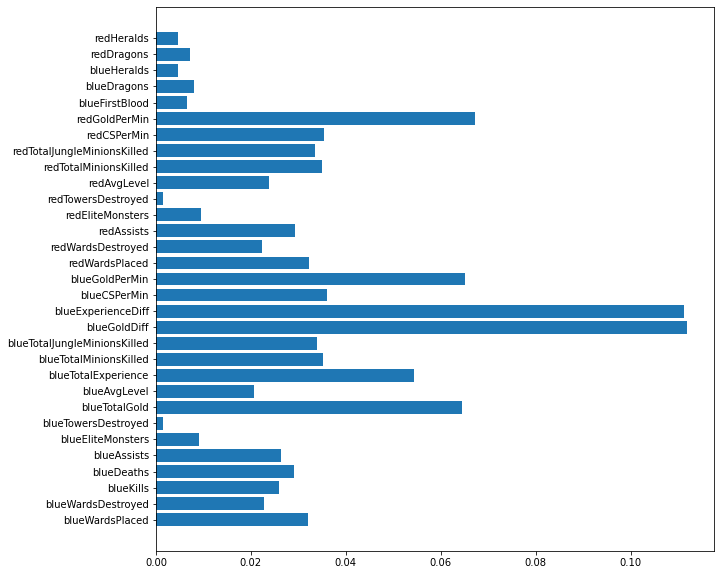

In [32]:
fig = plt.figure(figsize=(10, 10))
plt.barh(X.columns, rf.feature_importances_)

# AdaBoostClassifier

In [33]:
ada=AdaBoostClassifier()
ada.fit(X_train, y_train)
scores = cross_val_score(ada, X_train,y_train, cv=10) 
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))

cross-val-score 
[0.72543353 0.70520231 0.71242775 0.69797688 0.71531792 0.73082489
 0.72937771 0.70622287 0.7366136  0.723589  ]
cross-val-score.mean 
0.718


In [34]:
ypred = ada.predict(X_test)
print("Test Accuracy: {}%".format(round(ada.score(X_test, y_test)*100, 2)))
print("Random Forest Classifier report: \n\n", classification_report(y_test, ypred))

Test Accuracy: 73.72%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1469
           1       0.75      0.71      0.73      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



<BarContainer object of 31 artists>

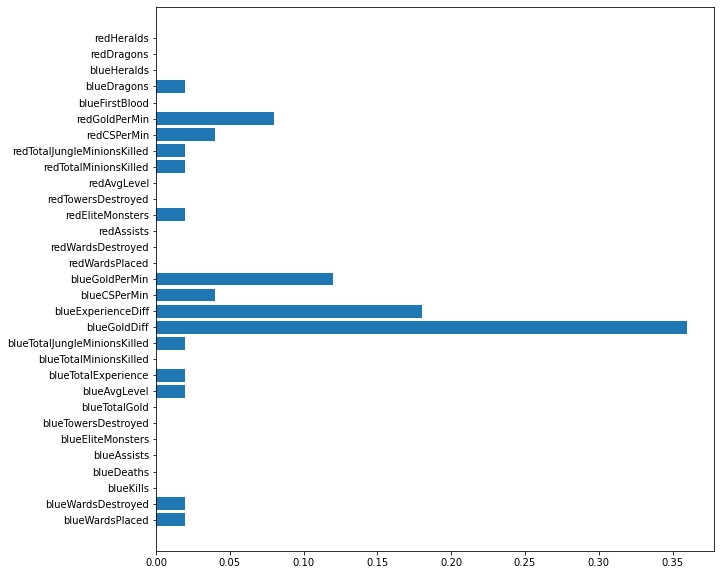

In [35]:
fig = plt.figure(figsize=(10, 10))
plt.barh(X.columns, ada.feature_importances_)

# BaggingClassifier

In [36]:
bag=BaggingClassifier()
bag.fit(X_train, y_train)
scores = cross_val_score(bag, X_train,y_train, cv=10) 
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))


cross-val-score 
[0.68930636 0.67774566 0.69653179 0.64595376 0.66763006 0.7105644
 0.70332851 0.6845152  0.69609262 0.67583213]
cross-val-score.mean 
0.685


In [37]:
ypred = bag.predict(X_test)
print("Test Accuracy: {}%".format(round(bag.score(X_test, y_test)*100, 2)))
print("Random Forest Classifier report: \n\n", classification_report(y_test, ypred))

Test Accuracy: 69.2%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.67      0.75      0.71      1469
           1       0.72      0.63      0.67      1495

    accuracy                           0.69      2964
   macro avg       0.70      0.69      0.69      2964
weighted avg       0.70      0.69      0.69      2964



# ExtraTreesClassifier

In [38]:
xtree=ExtraTreesClassifier()
xtree.fit(X_train, y_train)
scores = cross_val_score(xtree, X_train,y_train, cv=10) 
print('cross-val-score \n{}'.format(scores))
print('cross-val-score.mean \n{:.3f}'.format(scores.mean()))


cross-val-score 
[0.73265896 0.71098266 0.72254335 0.69508671 0.68930636 0.73806078
 0.71924747 0.71201158 0.72069465 0.71780029]
cross-val-score.mean 
0.716


In [39]:
ypred = xtree.predict(X_test)
print("Test Accuracy: {}%".format(round(xtree.score(X_test, y_test)*100, 2)))
print("Random Forest Classifier report: \n\n", classification_report(y_test, ypred))

Test Accuracy: 73.62%
Random Forest Classifier report: 

               precision    recall  f1-score   support

           0       0.73      0.75      0.74      1469
           1       0.75      0.72      0.73      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



<BarContainer object of 31 artists>

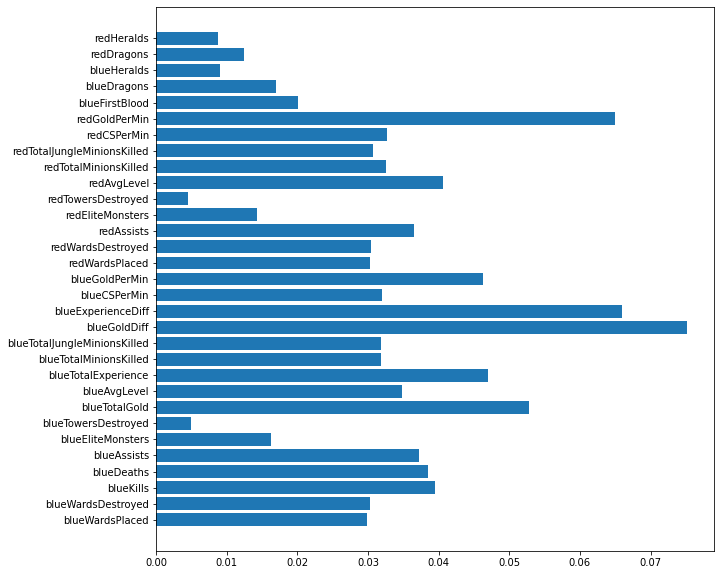

In [40]:
fig = plt.figure(figsize=(10, 10))
plt.barh(X.columns, xtree.feature_importances_)